<a href="https://www.kaggle.com/code/egyfirst/stability-vs-number-of-nearest-neighbor?scriptVersionId=127741753" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os.path

import warnings
warnings.filterwarnings('ignore')

In [2]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# then import it
from denmune import DenMune

     |████████████████████████████████| 41 kB 292 kB/s             
     |████████████████████████████████| 9.2 MB 8.1 MB/s            


In [3]:
# clone datasets from our repository datasets
if not os.path.exists('datasets'):
  !git clone https://github.com/egy1st/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 68 (delta 12), reused 63 (delta 10), pack-reused 0
Unpacking objects: 100% (68/68), 20.59 MiB | 6.24 MiB/s, done.


I am in One


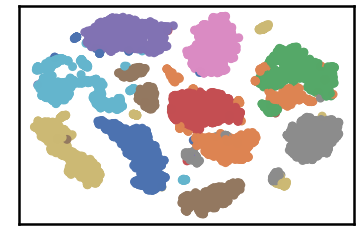

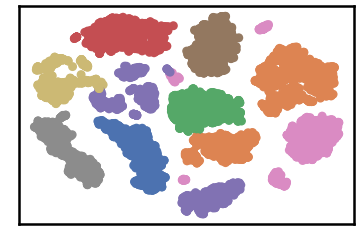

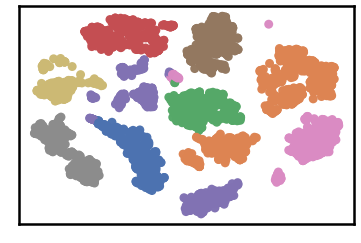

k= 199 F1 score is: 0.7887742906726016


In [4]:
data_path = 'datasets/denmune/pendigits/'  
file_2d = data_path + 'pendigits-2d.csv'

X_train = pd.read_csv(data_path + 'train.csv', sep=',', header=None)
y_train = X_train.iloc[:, -1]
X_train = X_train.drop(X_train.columns[-1], axis=1) 
X_test = pd.read_csv(data_path + 'test.csv', sep=',', header=None) 
X_test = X_test.drop(X_test.columns[-1], axis=1)

data_stability = [] 

from IPython.display import clear_output
for knn in range (1, 200):
  clear_output(wait=True)
  dm = DenMune(train_data=X_train,
             train_truth=y_train,
             test_data=X_test, 
             k_nearest=knn,
             file_2d=file_2d,
             rgn_tsne=False)

  labels, validity = dm.fit_predict(show_plots=True, show_analyzer=False)
  
  validity_key = "F1"      
  print ('k=' , knn, validity_key , 'score is:', validity['train'][validity_key])
  data_stability.append([knn, validity['train'][validity_key]])

In [5]:
#computing moving average to smoth the curve
x, y = zip(*data_stability)
window = 5
cumsum, moving_aves = [0], []

for i, n in enumerate(y, 1):
    cumsum.append(cumsum[i-1] + n)
    if i>=window:
        moving_ave = (cumsum[i] - cumsum[i-window])/window
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)
y = moving_aves        

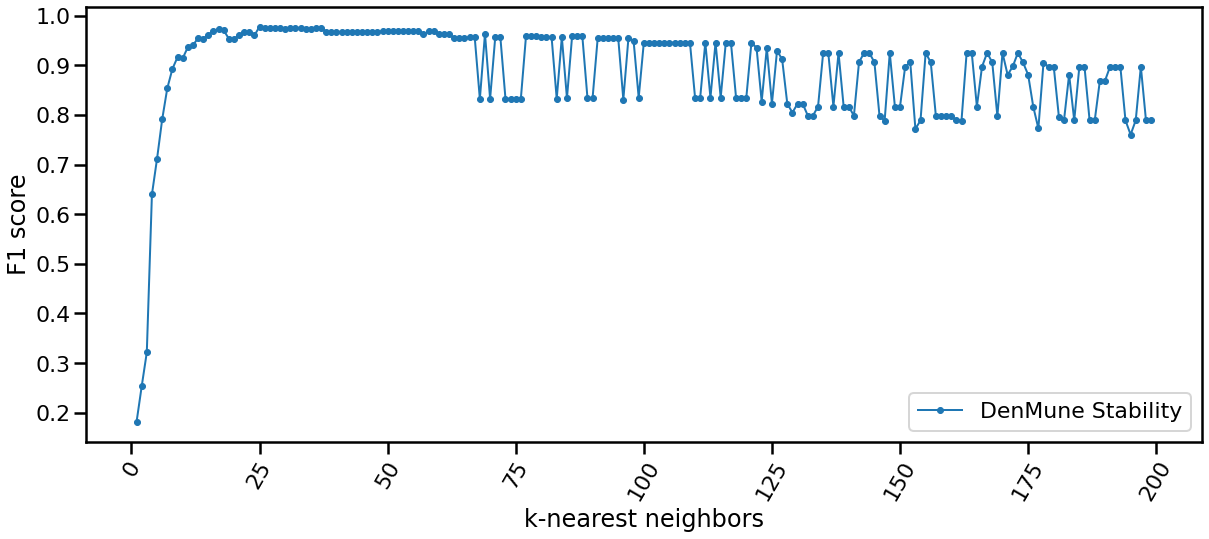

In [6]:
x, y = zip(*data_stability)
# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[20, 8])
ax.plot(x, y, marker='.', linewidth=2, label='DenMune Stability')
plt.xticks(rotation=60)
ax.set_xlabel('k-nearest neighbors')
ax.set_ylabel(validity_key + ' score')
plt.legend()
plt.show()